In [1]:
from numpy import *
from pandas import *
from scipy.stats import *
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
data = read_csv('Data_MOBETa.csv',sep=';')
species = ['Billinga','Tali','Eveuss','Okan','Massaranduba','Greenheart']

random.seed(10)

def faKRmod(rho,KR,MOEaKR,D1,D2,D3,D4,D5):
    f = (( rho*MOEaKR*(1-D3*KR) ) / ( D1*rho*(1-D4*KR) + D2*MOEaKR )) + D5
    return f

def errormod(rho,KR,MOE,D1,D2,D3,D4,X1,X2,vF,vM):
    error = (X2*vF*sqrt(1-r**2) * (1-D3*KR)*rho*MOE ) / (D1*rho*(1-D4*KR) + D2*MOE)
    return error

def stdmod(rho,KR,MOE,D1,D2,D3,D4,vF):
    std = (vF*sqrt(1-r**2) * (1-D3*KR)*rho*MOE ) / (D1*rho*(1-D4*KR) + D2*MOE)
    return std

In [3]:
for i in species: 
    nmetKR = len(data.KR[(data.KR>0)&(data.Species==i)])
    a = data.KR[(data.KR==0)&(data.Species==i)]
    remove_n = len(a) - nmetKR
    drop_indices = random.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

# Nonlinear regression on prediction model applied to measured data
First, the $D_i$ are determined from regression applied to the measured data. Next, the found values of $D_i$ are
used to classify timber in strength classes. 

Totaal aantal punten =  288
D1 =  200.066174421 D2 =  -0.506646760878 D3 =  0.0805525188599 D4 =  -0.399240611961 D5 =  -26.013789473
r^2 =  0.684033367151


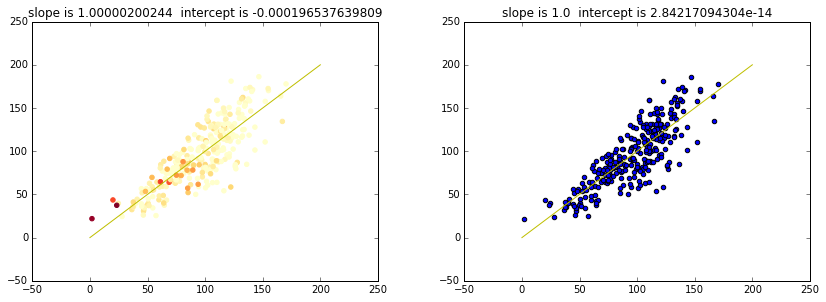

In [7]:
############ D's directly determined from non-lineair regression model on measured data ###########
def residuals(D,f,rho,KR,MOE):
    D1,D2,D3,D4,D5 = D
    err = f - ((( rho*MOE*(1-D3*KR) ) / ( D1*rho*(1-D4*KR) + D2*MOE )) + D5)
    return err

btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

print "Totaal number data = ",len(ytot)

D0 = [D1,D2,D3,D4,D5]
Dlsq = leastsq(residuals, D0, args=(ytot,x1tot,x2tot,x3tot))
D1,D2,D3,D4,D5 = Dlsq[0]
print "D1 = ",D1, "D2 = ", D2, "D3 = ", D3, "D4 = ", D4, "D5 = ", D5

xtot = faKRmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,D5)
slopetot, intercepttot, r_valuetot, p_value, std_err = linregress(xtot,ytot)
print "r^2 = ",r_valuetot**2
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopetot)+"  intercept is "+str(intercepttot))
s1 = ax1.scatter(xtot,ytot,c=x2tot,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'y')

xadj = slopetot*xtot+intercepttot
slopeadj, interceptadj, r_valueadj, p_valueadj, std_erradj = linregress(xadj,ytot)
ax2 = fig.add_axes([0.55,0.05,0.4,0.9])
ax2.set_title("slope is "+str(slopeadj)+"  intercept is "+str(interceptadj))
s1 = ax2.scatter(xadj,ytot)
s2 = ax2.plot(reeks,reeks*slopeadj+interceptadj,'y')
plt.show()

-7.19978559015e-17 -2.37012029499e-14
r^2 =  0.684033367151
r^2 =  0.4006195906


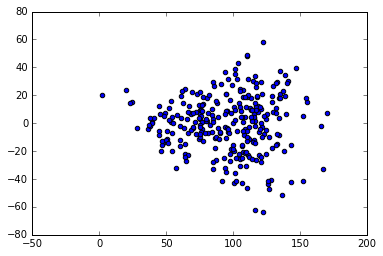

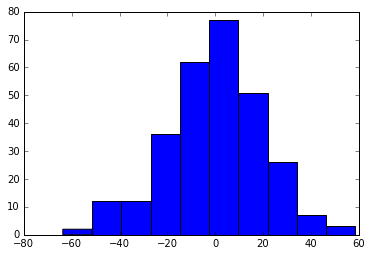

In [25]:
# Plot of the error and its distribution (roughly normally distributed)
error = ytot - (slopetot*xtot+intercepttot)
plt.scatter(xtot,error)
slopeerr,intercepterr,rerr,perr,stderrerr = linregress(xtot,error)
print (slopeerr,intercepterr)

print ("r^2 = ",r_valuetot**2)
print ("r^2 = ",r_valuegreen**2)

plt.figure()
plt.hist(error)

# savetxt('errDdirect',error)

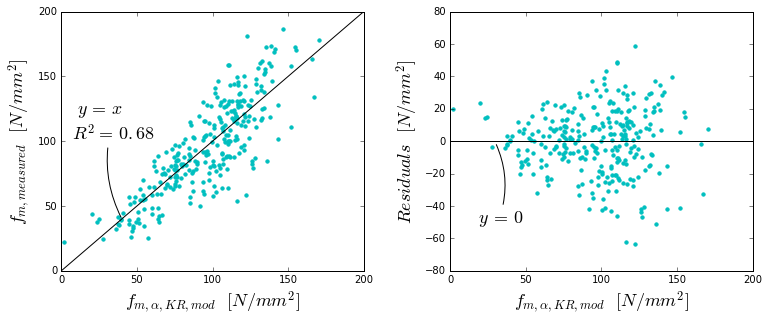

In [9]:
# Nice graph for in report
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$f_{m,measured}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
s1 = ax1.scatter(xtot,ytot,color='c',edgecolor='face',s=11)
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'k')
annotation_string = r"""$\,\,y\,=\,x$
$R^2=\,0.68$"""
plt.annotate(annotation_string,
             xy=(40,40), xycoords='data',
             xytext=(-50,80), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))

ax2 = fig.add_axes([0.5,0.05,0.35,0.9])
ax2.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax2.xaxis.label.set_fontsize(18)
ax2.set_ylabel(r'$Residuals$  $[N/mm^2]$')
ax2.yaxis.label.set_fontsize(18)
ax2.set_xlim(0,200)
ax2.set_ylim(-80,80)
s3 = ax2.scatter(xtot,error,color='c',edgecolor='face',s=11)
s4 = ax2.plot(reeks,reeks*slopeerr+intercepterr,'k')
annotation_string = r"""$\,y\,=\,0$"""
plt.annotate(annotation_string,
             xy=(30,-1), xycoords='data',
             xytext=(-20,-80), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))
# plt.savefig('directDregress'+'.eps', bbox_inches='tight')

0.253472222222
0.100694444444


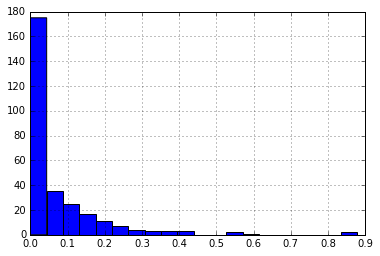

In [10]:
# Distribution of the knot ratio in the sample
data.KR.hist(bins=20)
print (len(data.KR[data.KR>0.1]) / float(len(data.KR)))
print (len(data.KR[data.KR>0.2]) / float(len(data.KR)))

In [11]:
# Kruskall-Wallis test on the similarity of the predicted and measured error distributions
btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12
# for i in range(len(X1)):
#     while (X1[i]<-2) | (X1[i]>2):
#         X1[i] = np.random.standard_normal(1)
# for i in range(len(X2)):
#     while (X2[i]<-2) | (X2[i]>2):
#         X2[i] = np.random.standard_normal(1)
        
vF = 0.39
vM = 0.24
r = 0.87

Hstatistic = []
pvalue = []
for i in range(10000):
    X1=np.random.standard_normal(len(x1tot))
    X2=np.random.standard_normal(len(x1tot))
    errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
    Hstatistic.append(kruskal(error,errorpred)[0])
    pvalue.append(kruskal(error,errorpred)[1])
    
print (mean(Hstatistic))
print (mean(pvalue))
# plt.scatter(xtot,errorpred,color='y')
# plt.scatter(xtot,error,color='g')


0.656567866524
0.566904203517


LeveneResult(statistic=1.2548504049961438, pvalue=0.2630965769920795)
KruskalResult(statistic=0.12356477469666061, pvalue=0.72519990927733102)
BartlettResult(statistic=1.0583744019886137, pvalue=0.3035862391526819)


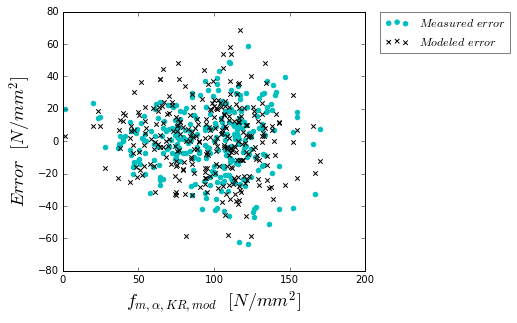

In [12]:
# Nice graph for report
reeks = np.linspace(0,250,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$Error$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,200)
ax1.set_ylim(-80,80)
s1 = ax1.scatter(xtot,error,color='c',edgecolor='face',label='$Measured$ $error$')
s2 = ax1.scatter(xtot,errorpred,color='k',marker='x',label='$Predicted$ $error$')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd.get_frame().set_linewidth(0.5)
print levene(error,errorpred,center='mean')
print kruskal(error,errorpred)
print bartlett(error,errorpred)
# plt.savefig('errDdirect'+'.eps', bbox_inches='tight')

In [13]:
xadj = xtot*slopetot + intercepttot
slopeadj, interceptadj, r_valueadj, p_valueadj, std_erradj = linregress(xadj,ytot)

vF = 0.39
vM = 0.24
r = 0.87

X1 = np.random.standard_normal(len(x1tot))
X2 = np.random.standard_normal(len(x1tot))
errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
stdpred = stdmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,vF)
slopestd,interceptstd,rstd,pstd,stderrstd = linregress(xtot,stdpred)
print (slopestd,interceptstd)

0.192290171356 5.00219603538


mean =  95.719641199    std =  29.6182864242
p=0.09 D=0.07


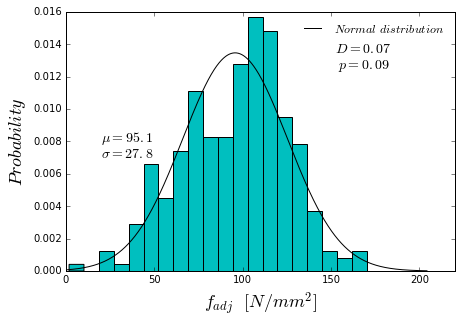

In [24]:
# Distribution of the predicted strength values
X = xadj
param_norm = norm.fit(X,loc=0,scale=1)
print ("mean = ", param_norm[0], "   std = ",param_norm[1])
Dnorm,pnorm = kstest(X,'norm',param_norm)
x1 = linspace(0,X.max()*1.2,1000)
norm_pdf = norm.pdf(x1,param_norm[0],param_norm[1])
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
ax.plot(x1,norm_pdf,'b',label="$Normal$ $distribution$", color='k')
print ("p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
ax.hist(X,normed=True,bins=20,color='c')
ax.set_xlabel(r'$f_{adj}$  $[N/mm^2]$')
ax.set_ylabel(r'$Probability$')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xlim(0,220)
lgd = plt.legend(loc=0, borderaxespad=0.5,fontsize = 12)
lgd.get_frame().set_linewidth(0)
ax.text(20,0.008,r'$\mu = 95.1$',fontsize=14)
ax.text(20,0.007,r'$\sigma = 27.8$',fontsize=14)
ax.text(152,0.0135,r'$D = 0.07$', fontsize = 14)
ax.text(154,0.0125,r'$p = 0.09$', fontsize = 14)
# plt.savefig('KSDdirect'+'.eps',bbox_inches='tight')

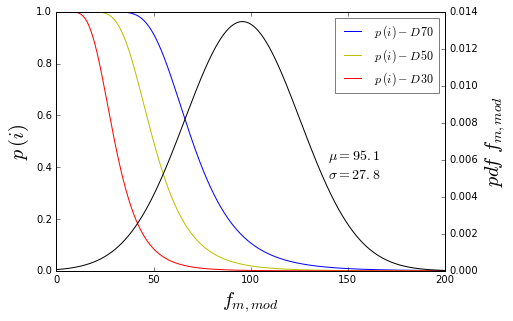

In [15]:
x = linspace(0.05,199.95,2000)
fmstat = slopeadj*x + interceptadj
se = fmstat*slopestd + interceptstd
IP = norm.pdf(x,loc=mean(xadj),scale=std(xadj))
fm0570 = 70.*ones(len(x))
fm0550 = 50.*ones(len(x))
fm0530 = 30.*ones(len(x))
p_i70 = norm.cdf(70,loc=fmstat,scale=se)
p_i50 = norm.cdf(50,loc=fmstat,scale=se)
p_i30 = norm.cdf(30,loc=fmstat,scale=se)

fig = plt.figure()
ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
ax1.plot(x,p_i70,'b',label=r'$p\,(i) - D\,70$')
ax1.plot(x,p_i50,'y',label=r'$p\,(i) - D\,50$')
ax1.plot(x,p_i30,'r',label=r'$p\,(i) - D\,30$')
ax1.set_xlabel(r'$f_{m,mod}$')
ax1.set_ylabel(r'$p\,(i)$')
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
lgd = plt.legend(loc=0, borderaxespad=0.5)
lgd.get_frame().set_linewidth(0.5)

ax2 = ax1.twinx()
ax2.plot(x,IP,'k')
ax2.set_ylabel(r'$pd\!f$ $f_{m,mod}$')
ax2.yaxis.label.set_fontsize(20)
ax2.text(140,0.006,r'$\mu = 95.1$',fontsize=14)
ax2.text(140,0.005,r'$\sigma = 27.8$',fontsize=14)

#plt.savefig('pi_met_pdffmod'+'.eps',bbox_inches='tight')

p_char70 =  0.0499235520957   pi70low =  0.121142584002   pi70high =  0.00139145870618   IP70low =  97.85   IP50high =  97.75
977


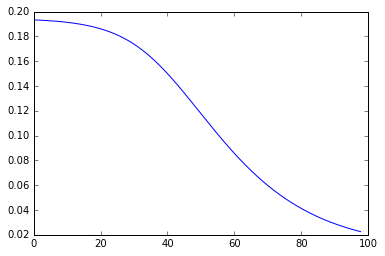

In [16]:
pchar70 = ones(len(x))
for i in range(len(pchar70)):
    pchar70[i] = sum(p_i70[i:]*IP[i:]) / sum(IP[i:])

for i in range(len(pchar70)):
    if pchar70[i]<0.05:
        p_char70 = pchar70[i]
        pi70low = p_i70[i]
        pi70high = p_i70[-1]
        IP70low = fmstat[i]
        IP50high = fmstat[i-1]
        einde = i-1
        print ("p_char70 = ",p_char70, "  pi70low = ",pi70low,"  pi70high = ",pi70high,"  IP70low = ",IP70low,"  IP50high = ",IP50high)
        print (einde)
        break

pchar50 = ones(len(range(einde)))
for i in range(len(pchar50)):
    pchar50[i] = sum(p_i50[i:einde]*IP[i:einde]) / sum(IP[i:einde])

plt.plot(x[0:einde],pchar50)

In [17]:
for i in range(len(pchar50)):
    if pchar50[i]<0.05:
        p_char50 = pchar50[i]
        pi50low = p_i50[i]
        pi50high = p_i50[-1]
        IP50low = fmstat[i]
        IP30high = fmstat[i-1]
        einde2 = i-1
        print ("p_char50 = ",p_char50, "  pi50low = ",pi50low,"  pi50high = ",pi50high,"  IP50low = ",IP50low,"  IP30high = ",IP30high)
        print (einde2)
        break
        
pchar30 = ones(len(range(einde2)))
for i in range(len(pchar30)):
    pchar30[i] = sum(p_i30[i:einde2]*IP[i:einde2]) / sum(IP[i:einde2])

for i in range(len(pchar30)):
    if pchar30[i]<0.05:
        p_char30 = pchar30[i]
        pi30low = p_i30[i]
        pi30high = p_i30[-1]
        IP30low = fmstat[i]
        print ("p_char30 = ",p_char30, "  pi30low = ",pi30low,"  pi30high = ",pi30high,"  IP30low = ",IP30low)
        break

p_char50 =  0.0498178818572   pi50low =  0.100052858048   pi50high =  0.000279210950296   IP50low =  74.85   IP30high =  74.75
747
p_char30 =  0.0499598999952   pi30low =  0.266017714165   pi30high =  4.58933020701e-05   IP30low =  37.65


In [18]:
yD70 = len(xadj[xadj>=IP70low]) / float(len(xadj))
yD50 = len(xadj[(xadj>=IP50low)&(xadj<=IP50high)]) / float(len(xadj))
yD30 = len(xadj[(xadj>=IP30low)&(xadj<=IP30high)]) / float(len(xadj))

print ("Percentages voor D70, D50 en D30 zijn: ",100*yD70,100*yD50,100*yD30)
print ("Weggooien: ",(1-(yD70+yD50+yD30))*100)

print ("Fractile D70 onder 70 = ",len(data.fm12[(data.fm12<70)&(xadj>IP70low)]) / float(len(data.fm12[(xadj>IP70low)])))

print ("Fractile D50 onder 50 = ",len(data.fm12[(data.fm12<50)&(xadj<=IP50high)&(xadj>=IP50low)]) / float(len(data.fm12[(xadj<=IP50high)&(xadj>=IP50low)])))
print (len(data.fm12[(data.fm12<50)&(xadj<=IP50high)&(xadj>=IP50low)]))
print ("Fractile D30 onder 30 = ",len(data.fm12[(data.fm12<30)&(xadj<=IP30high)&(xadj>=IP30low)]) / float(len(data.fm12[(xadj<=IP30high)&(xadj>=IP30low)])))

Percentages voor D70, D50 en D30 zijn:  52.4305555556 23.9583333333 21.1805555556
Weggooien:  2.43055555556
Fractile D70 onder 70 =  0.046357615894
Fractile D50 onder 50 =  0.0
0
Fractile D30 onder 30 =  0.0327868852459


In [19]:
predD70 = (1-norm.cdf(IP50high,loc=mean(xadj),scale=std(xadj)))*100
predD50 = (norm.cdf(IP50high,loc=mean(xadj),scale=std(xadj)) - norm.cdf(IP50low,loc=mean(xadj),scale=std(xadj)))*100
predD30 = (norm.cdf(IP30high,loc=mean(xadj),scale=std(xadj)) - norm.cdf(IP30low,loc=mean(xadj),scale=std(xadj)))*100

print ("Predicted yield D70 = ",predD70)
print ("Predicted yield D50 = ",predD50)
print ("Predicted yield D30 = ",predD30)
print ("Rejected = ", 100-(predD70 + predD50 + predD30))

Predicted yield D70 =  47.2673570173
Predicted yield D50 =  28.6803099796
Predicted yield D30 =  21.4510941313
Rejected =  2.6012388718


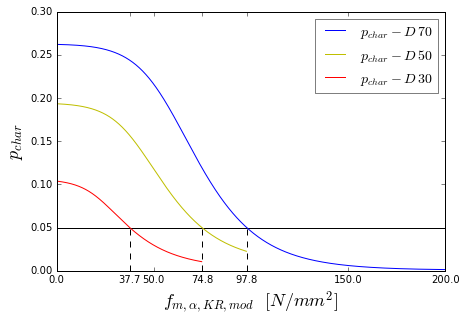

In [20]:
# plt.figure()
# plt.plot(x[0:einde2],p_i30[0:einde2],'y')
# plt.plot(x[einde2:einde],p_i50[einde2:einde],'g')
# plt.plot(x[einde:],p_i70[einde:],'b')
plt.figure()
fig = plt.figure()
ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
ax1.plot(x,pchar70,'b',label=r'$p_{char} - D\,70$')
ax1.plot(x[0:einde],pchar50,'y',label=r'$p_{char} - D\,50$')
ax1.plot(x[0:einde2],pchar30,'r',label=r'$p_{char} - D\,30$')
ax1.hlines(0.05,0,200)
ax1.set_ylabel('p char value')
ax1.set_xlabel('f adjusted')
ax1.vlines(IP70low,0,0.05,linestyle='--')
ax1.vlines(IP50low,0,0.05,linestyle='--')
ax1.vlines(IP30low,0,0.05,linestyle='--')
ax1.set_xticks([0,IP30low,50,IP50low,IP70low,150,200])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.set_ylabel(r'$p_{char}$')
ax1.yaxis.label.set_fontsize(18)
lgd = plt.legend(loc=0, borderaxespad=0.5,fontsize=14)
lgd.get_frame().set_linewidth(0.5)
# plt.savefig('pcharDdirect'+'.eps',bbox_inches='tight')
plt.show();

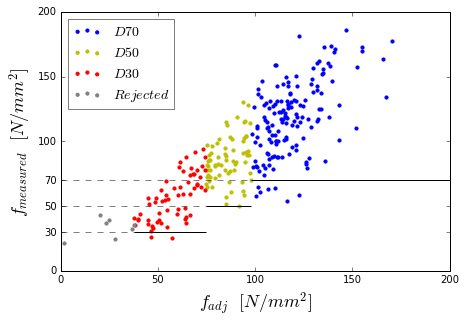

In [21]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
s1 = ax.scatter(xadj[xadj>=IP70low],data.fm12[xadj>=IP70low],color='b',s=10,label=r'$D70$')
s2 = ax.scatter(xadj[(xadj>=IP50low)&(xadj<=IP50high)],data.fm12[(xadj>=IP50low)&(xadj<=IP50high)],color='y',s=10,label=r'$D50$')
s3 = ax.scatter(xadj[(xadj>=IP30low)&(xadj<=IP30high)],data.fm12[(xadj>=IP30low)&(xadj<=IP30high)],color='r',s=10,label=r'$D30$')
s4 = ax.scatter(xadj[xadj<IP30low],data.fm12[xadj<IP30low],color='Grey',s=10,label=r'$Rejected$')
ax.set_xlim(0,200)
ax.set_ylim(0,200)
ax.hlines(70,IP70low,200)
ax.hlines(50,IP50low,IP50high)
ax.hlines(30,IP30low,IP30high)
ax.hlines(70,0,IP70low,lw=0.5,linestyle='--')
ax.hlines(50,0,IP50low,lw=0.5,linestyle='--')
ax.hlines(30,0,IP30low,lw=0.5,linestyle='--')
ax.set_yticks([0,30,50,70,100,150,200])

ax.set_xlabel(r'$f_{adj}$  $[N/mm^2]$')
ax.set_ylabel(r'$f_{measured}$  $[N/mm^2]$')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
lgd = plt.legend(loc=2, borderaxespad=0.5,fontsize=14)
lgd.get_frame().set_linewidth(0.5)

# plt.savefig('gradedDdirect'+'.eps',bbox_inches='tight')

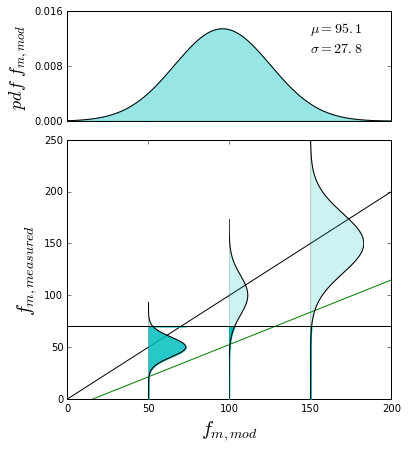